> # Malaria_detection_using_ConvNet_with_keras

## This is a simple implementation of Convnet i.e Convolutional Neural Network to detect based on the cell image, a person is infected with malaria or Not

### Why do we have to use Convnets? the answer is becuase ConvNets are based upon the human retina and how brain neurons process the data captured by our retina, Same as the human eye ConvNets detect smaller features from the given image and as our brain neurons ConvNets process the smaller features to generate a unique perspective of the given image and can by training them they can detect objects same as our brain.

### Now let's discuss about this dataset , this is a dataset of a collection of cell images that are both infected and uninfected, and given a cell Image we have to detect if it is unfected with malaria or not, so the folder path "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected" contains images of the cells that are not infected by Malaria and the folder path "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized" contains images of the cells that are infected by Malaria.


Please upvote if you like this implementation of Convolutional Neural Network and comment if you have better solution to this problem. 


In [1]:
# Importing all the libraries we need

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Dense , Flatten , Dropout
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator , load_img
import os

# Printing all the folder names 
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input
/kaggle/input/cell-images-for-detecting-malaria
/kaggle/input/cell-images-for-detecting-malaria/cell_images
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized


In [2]:
# Creting variables for storing the dir path so that it's easy when making dataset

# Uninfected
uninfected = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected")

#Infected
parasitized = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")
filename = []
Category = []

#Looping through each file in the uninfected dir
for file in uninfected:
    
    #appending the file names to the list filename
    filename.append("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/"+file)
    
    #appending the Category of the image to the list Category
    Category.append("Uninfected")
    
# Looping through each file in the parasitized dir
for file in parasitized:
    
    # appending the file names to the list filename
    filename.append("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/"+file)
    
    #appending the Category of the image to the list Category
    Category.append("infected")
 
# Creating a dataframe from the lists we created 

df = pd.DataFrame({
    "File_name":filename,
    "Category":Category
})

In [3]:
# First ten instances of the DataFrame

df.head(10)

,File_name,Category
0,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
1,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
2,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
3,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
4,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
5,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
6,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
7,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
8,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
9,/kaggle/input/cell-images-for-detecting-malari...,Uninfected


In [4]:
# Last ten instance of the Dataframe

df.tail(10)

,File_name,Category
27550,/kaggle/input/cell-images-for-detecting-malari...,infected
27551,/kaggle/input/cell-images-for-detecting-malari...,infected
27552,/kaggle/input/cell-images-for-detecting-malari...,infected
27553,/kaggle/input/cell-images-for-detecting-malari...,infected
27554,/kaggle/input/cell-images-for-detecting-malari...,infected
27555,/kaggle/input/cell-images-for-detecting-malari...,infected
27556,/kaggle/input/cell-images-for-detecting-malari...,infected
27557,/kaggle/input/cell-images-for-detecting-malari...,infected
27558,/kaggle/input/cell-images-for-detecting-malari...,infected
27559,/kaggle/input/cell-images-for-detecting-malari...,infected


In [5]:
# Getting the number of unique values and there counts

df['Category'].value_counts()

Uninfected    13780
infected      13780
Name: Category, dtype: int64

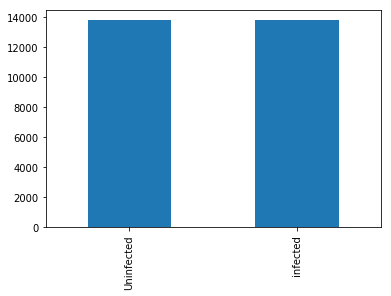

In [6]:
# plotting a bar graph of the unique values in the dataframe

df['Category'].value_counts().plot.bar()

In [7]:
# Shuffling the Dataframe to make it a little bit complex for the network

from sklearn.utils import shuffle
df = shuffle(df , random_state=0)

In [8]:
# First 10 instances of the shuffled data

df.head(10)

,File_name,Category
1002,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
169,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
20212,/kaggle/input/cell-images-for-detecting-malari...,infected
3478,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
20002,/kaggle/input/cell-images-for-detecting-malari...,infected
19784,/kaggle/input/cell-images-for-detecting-malari...,infected
12759,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
9492,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
15431,/kaggle/input/cell-images-for-detecting-malari...,infected
3840,/kaggle/input/cell-images-for-detecting-malari...,Uninfected


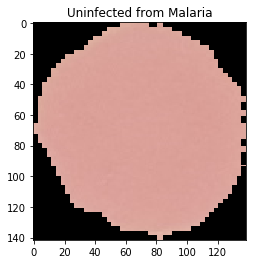

In [9]:
# Plotting the cell image of a Uninfected cell

img = load_img(df['File_name'][0])
plt.imshow(img)
plt.title("Uninfected from Malaria")
plt.show()

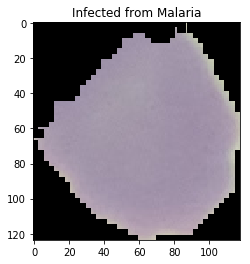

In [10]:
# Plotting the cell image of a Infected cell

img = load_img(df["File_name"][4])
plt.imshow(img)
plt.title("Infected from Malaria")
plt.show()

In [11]:
# Just to make clear that the data is perfectly shuffled with correct category tag

sample_data = df.head(20)
for index , row in sample_data.iterrows():
    print(row['File_name'] + " ------> " + row['Category'])

/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C169P130ThinF_IMG_20151118_172913_cell_18.png ------> Uninfected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C45P6ThinF_IMG_20151130_155011_cell_72.png ------> Uninfected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C48P9thinF_IMG_20150721_164129_cell_36.png ------> infected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C188P149ThinF_IMG_20151203_135433_cell_53.png ------> Uninfected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C132P93ThinF_IMG_20151004_152045_cell_120.png ------> infected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_110435_cell_108.png ------> infected
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C213ThinF_IMG_20151106_112252_c

In [12]:
# Creating our Dataset from the dataframe

X = []
Y = []
for index , row in df.iterrows():
    
    try:
        # Reading the image from the dataframe
        img = cv2.imread(row['File_name'] , cv2.IMREAD_COLOR)
        
        # Resizing the image to our desired dimensions
        img = cv2.resize(img , (128,128))
        
        # Appending the resized image to X
        X.append(np.array(img))
        
        # Appending the Category to Y
        Y.append(row['Category'])
        
    except:
        pass
    
# Just to make sure everything is perfect
print(len(X))
print(len(Y))

27558
27558


In [13]:
# Verifyting if the images appended is of our desired dimesnsion or not

print(X[1].shape)

(128, 128, 3)


In [14]:
# Printing the first value of X i.e first image

print(X[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [15]:
# First five instances of Y 

print(Y[0:5])

['Uninfected', 'Uninfected', 'infected', 'Uninfected', 'infected']


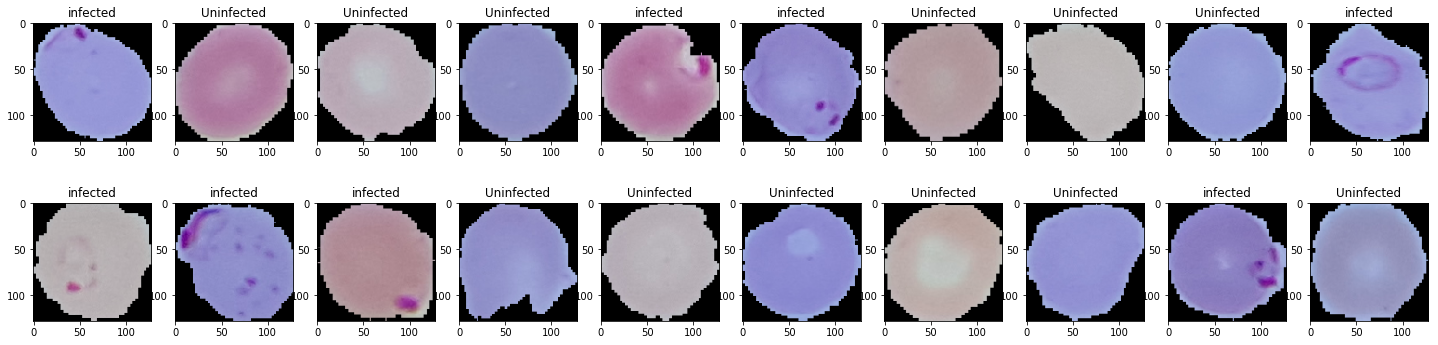

In [16]:
# Plotting some random images of uninfected and infected cell images to get a better idea, how the infected and uninfected cell looks like

import random

# Creating subplots
fig , ax = plt.subplots(2,10)
# Adjusting the space between the plots
plt.subplots_adjust(bottom=0.3,top=0.5, hspace=0)
# Setting the figure size
fig.set_size_inches(25,25)


# Looping thorugh 2 rows and 10 columns
for i in range(2):
    for j in range(10):
        
        # Genereating a random number per iteration
        l = random.randint(0,len(Y))
        # Plotting the image
        ax[i,j].imshow(X[l])
        # Setting the title of image
        ax[i,j].set_title(Y[l])
        # Giving aspect ratio
        ax[i,j].set_aspect('equal')


In [17]:
# Converting the list to numpy arrays for better computation practice

X = np.array(X)
Y = np.array(Y)

In [18]:
# Reassuring the type

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# Using sklearn's LabelEncoder to encode our categorical data

enc = LabelEncoder()
Y = enc.fit_transform(Y)

In [20]:
print(type(Y))

<class 'numpy.ndarray'>


In [21]:
# Now the data is converted in form of numbers
# Where 0 is Uninfected and 1 is Infected

print(Y[0:5])

[0 0 1 0 1]


In [22]:
# Splitting the data into training and testing

X_train , x_test, Y_train ,  y_test = train_test_split(X , Y)

In [23]:
print(len(X_train))

20668


In [24]:
print(len(x_test))

6890


In [25]:
print(len(Y_train))

20668


In [26]:
print(len(y_test))

6890


In [27]:
# Creating our Convolutional Neural Network

model = Sequential()

# First Convolution layer
model.add(Conv2D(32 , (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Second Convolution layer
model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D( pool_size = (2,2)))

# Third Convolution layer
model.add(Conv2D(128 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D( pool_size = (2,2)))

# Fourth Convolution layer
model.add(Conv2D( 256 , (3,3) , activation = 'relu') )
model.add(MaxPooling2D( pool_size = (2,2)))

# Converting the data to a one dimension format
model.add(Flatten())

# Hidden layer with 256 neurons
model.add(Dense(256 , activation = "relu"))

# 50% of the random neurons will shut down , to get rid of overfitting
model.add(Dropout(0.5))

model.add(Dense( 1 , activation = "sigmoid"))

In [28]:
# An essential step where we define what optimizer should be used by our model, what should be the loos function and based of what metrics model should learn

model.compile( optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [29]:
# Fitting our training data to our model

model.fit(X_train , Y_train , epochs = 20 , batch_size = 32)

Epoch 1/20
20668/20668 [==============================] - 13s 652us/step - loss: 0.6147 - accuracy: 0.8453
Epoch 2/20
20668/20668 [==============================] - 10s 469us/step - loss: 0.1638 - accuracy: 0.9494
Epoch 3/20
20668/20668 [==============================] - 10s 464us/step - loss: 0.1423 - accuracy: 0.9529
Epoch 4/20
20668/20668 [==============================] - 10s 494us/step - loss: 0.1329 - accuracy: 0.9552
Epoch 5/20
20668/20668 [==============================] - 10s 469us/step - loss: 0.1278 - accuracy: 0.9594
Epoch 6/20
20668/20668 [==============================] - 10s 465us/step - loss: 0.1197 - accuracy: 0.9593
Epoch 7/20
20668/20668 [==============================] - 10s 462us/step - loss: 0.1162 - accuracy: 0.9598
Epoch 8/20
20668/20668 [==============================] - 10s 473us/step - loss: 0.1141 - accuracy: 0.9615
Epoch 9/20
20668/20668 [==============================] - 10s 465us/step - loss: 0.1023 - accuracy: 0.9648
Epoch 10/20
20668/20668 [============

In [30]:
# Evaluating our model on testing data

loss , accuracy = model.evaluate(x_test , y_test , batch_size = 32)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6890/6890 [==============================] - 1s 213us/step
Test accuracy: 95.47%


In [31]:
y_pred = model.predict(x_test)

[[3294  145]
 [ 167 3284]]


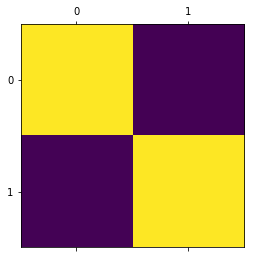

In [32]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix( y_test , y_pred.round() )
print(cm)
plt.matshow(cm)

The confusion matrix here defines that 3256 values for predicted correctly where the actual result was 0 that is uninfected and the predicted result was also 0, and 148 values were predicted wrong, same for Infected 184 values were predicted wrong and 3302 value were predicted right i.e Infected was the actual result and our model also predicted Infected